# Explore alternative plots for a published SAXS data set

Learning goals:
- Familiarize yourself with several python libraries, particularly matplotlib
- Evaluate which plotting choices may best aid you in your graphical storytelling

We will use here a SAXS data set published in Fig. 1b of _X. Wang, et al. In-situ X-ray scattering observation of colloidal epitaxy at the gas-liquid-solid interface. Nat Commun 16, 2687 (2025), https://doi.org/10.1038/s41467-025-58028-6._



## Load python libraries

In [ ]:
# load numerical analysis library.
import numpy as np

# load data handling libraries.
import pandas as pd

# load plotting libraries.
import matplotlib
from matplotlib import pyplot as plt
# and optionally, set here also as a default that legends do not have a frame and no face color.
matplotlib.rcParams['legend.frameon'] = False
matplotlib.rcParams['legend.facecolor'] = 'none'

# load the library for reading and writing Excel files.
# This is optional, but it is useful for reading and writing Excel files.
!pip install openpyxl

& was unexpected at this time.
The value specified in an AutoRun registry key could not be parsed.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\boehs\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Load experimental data

In [2]:
# path to the Excel data file
fpath_data = "./data/SAXS_height_dependence/41467_2025_58028_MOESM3_ESM.xlsx"           # this is the path to the source data provided in X. Wang, et al., Nat Commun 16, 2687 (2025), https://doi.org/10.1038/s41467-025-58028-6. 

In [3]:
# read data from the Excel file
df = pd.read_excel(fpath_data, sheet_name="Figure 1 b", header=[0, 1])

# let's briefly inspect our import (optional)
df

H= 400 μm                    H= 800 μm                    H= 1200 μm  \
     q (nm-1) intensity (arb.u.)  q (nm-1) intensity (arb.u.)   q (nm-1)   
0    0.036834       1.964347e+09  0.036834       1.717497e+09   0.036834   
1    0.037453       1.857820e+09  0.037453       1.625682e+09   0.037453   
2    0.038072       1.746124e+09  0.038072       1.531093e+09   0.038072   
3    0.038691       1.640243e+09  0.038691       1.439624e+09   0.038691   
4    0.039310       1.541572e+09  0.039310       1.351892e+09   0.039310   
..        ...                ...       ...                ...        ...   
936  0.616271       7.104328e+06  0.616271       6.836470e+06   0.616271   
937  0.616891       7.290547e+06  0.616891       6.813652e+06   0.616891   
938  0.617510       7.498832e+06  0.617510       7.079324e+06   0.617510   
939  0.618129       7.337468e+06  0.618129       6.936909e+06   0.618129   
940  0.618748       7.246492e+06  0.618748       6.918231e+06   0.618748   

                       H= 1600 μm                    H= 2000 μm  \
    intensity (arb.u.)   q (nm-1) intensity (arb.u.)   q (nm-1)   
0         1.547598e+09   0.036834       1.263759e+09   0.036834   
1         1.460874e+09   0.037453       1.194230e+09   0.037453   
2         1.379933e+09   0.038072       1.128474e+09   0.038072   
3         1.298981e+09   0.038691       1.064134e+09   0.038691   
4         1.222054e+09   0.039310       9.995295e+08   0.039310   
..                 ...        ...                ...        ...   
936       6.520273e+06   0.616271       6.087727e+06   0.616271   
937       6.555977e+06   0.616891       6.051476e+06   0.616891   
938       6.690990e+06   0.617510       6.126749e+06   0.617510   
939       6.655905e+06   0.618129       6.220365e+06   0.618129   
940       6.742522e+06   0.618748       6.271020e+06   0.618748   

                        ... H= 5000 μm                    H= 5200 μm  \
    intensity (arb.u.)  ...   q (nm-1) intensity (arb.u.)   q (nm-1)   
0         9.497677e+08  ...   0.036834       3.187424e+09   0.036834   
1         8.984557e+08  ...   0.037453       3.081717e+09   0.037453   
2         8.475814e+08  ...   0.038072       2.977474e+09   0.038072   
3         7.981013e+08  ...   0.038691       2.883202e+09   0.038691   
4         7.504593e+08  ...   0.039310       2.800976e+09   0.039310   
..                 ...  ...        ...                ...        ...   
936       5.666902e+06  ...   0.616271       4.986515e+06   0.616271   
937       5.677948e+06  ...   0.616891       5.011594e+06   0.616891   
938       5.719507e+06  ...   0.617510       5.065044e+06   0.617510   
939       5.682244e+06  ...   0.618129       5.091372e+06   0.618129   
940       5.760346e+06  ...   0.618748       5.092043e+06   0.618748   

                       H= 5400 μm                    H= 5600 μm  \
    intensity (arb.u.)   q (nm-1) intensity (arb.u.)   q (nm-1)   
0         3.197068e+09   0.036834       3.112691e+09   0.036834   
1         3.083905e+09   0.037453       3.012355e+09   0.037453   
2         2.978713e+09   0.038072       2.911815e+09   0.038072   
3         2.887433e+09   0.038691       2.821191e+09   0.038691   
4         2.801191e+09   0.039310       2.737009e+09   0.039310   
..                 ...        ...                ...        ...   
936       5.122290e+06   0.616271       5.181290e+06   0.616271   
937       5.099224e+06   0.616891       5.198733e+06   0.616891   
938       5.137631e+06   0.617510       5.303805e+06   0.617510   
939       5.141098e+06   0.618129       5.319420e+06   0.618129   
940       5.204366e+06   0.618748       5.256706e+06   0.618748   

                       H= 5800 μm                     
    intensity (arb.u.)   q (nm-1) intensity (arb.u.)  
0         3.175173e+09   0.036834       3.170382e+09  
1         3.066311e+09   0.037453       3.068420e+09  
2         2.962186e+09   0.038072       2.964885e+09  
3         2.876919e+09   0.038691       2.869174e+09  
4   

In [4]:
# Extract the x data
x_data_columns = df.columns[0::2]          # x data is in every second column, starting from the first one
x_data = df[x_data_columns].to_numpy()     # convert to numpy array
if np.all(x_data == x_data[:, 0, None]):   # check if all columns in x_data are equal
    x_data = x_data[:, 0]                   # use the first column as x data
else:
    raise ValueError("Not all x_data columns are equal. Please check the data and/or adapt the plotting here below.")    # raise an error if not

# Extract the y data
y_data_columns = df.columns[1::2]           # y data is in every second column, starting from the second one
y_data = df[y_data_columns].to_numpy()      # convert to numpy array

# Extract the z data from the df header
z_data_header = df.columns[0::2].get_level_values(0).to_numpy()     # z data is in the first row of the header, which is a MultiIndex
z_data = np.array([float(z_data_header[i].split("= ")[1].split(" ")[0]) for i in range(len(z_data_header))])       # get only the numerical data

In [5]:
# Get the x and y axis labels
x_label = df.columns[0][1]  # second header row of the first column
y_label = df.columns[1][1]  # second header row of the second column

# Get the z axis label
z_type = df.columns[0][0].split("=")[0]  # here we grab the type of the z data from the first header row
z_unit = df.columns[0][0].split("=")[1].split(" ")[-1]  # here we grab the units from the first header row
z_label_legend = "{} ({})".format(df.columns[0][0].split("=")[0], z_unit)  # the z label (to be displayed in, e.g., the legend)
z_label_traces = [z_data[_] for _ in range(len(z_data))] # the z label for the traces (containing only the numerical data)

## Plot

Within few lines of code we can obtain a first plot for inspection

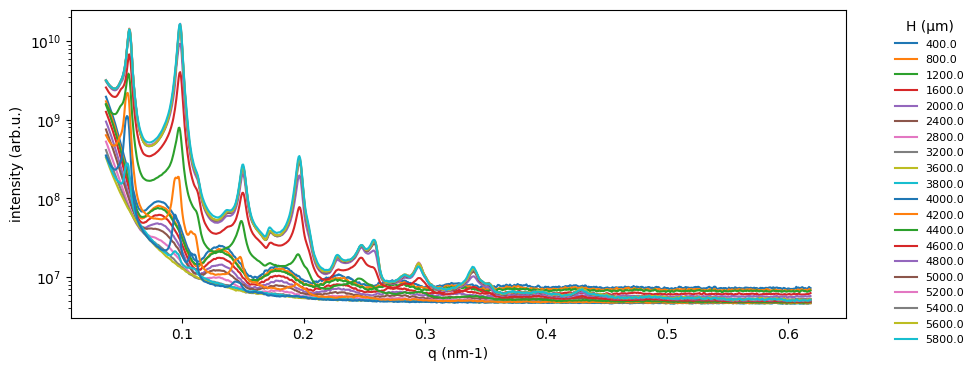

In [6]:
# Create the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

# Plot the data
for i in range(y_data.shape[1]):
    ax.plot(x_data, y_data[:, i], label=z_label_traces[i])

# Apply some more cosmetics
ax.set_yscale("log")  # Set y-axis to logarithmic scale
ax.set_xlabel(x_label)  # Set x-axis label
ax.set_ylabel(y_label)  # Set y-axis label
ax.legend(title=z_label_legend, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)     # Add a legend outside the plot

# Save the figure
fig.savefig("figure_B_SAXS_1D.png", dpi=300, bbox_inches="tight")

However, if we need a similar functionality more frequently, it could make sense to invest the time and define a plotting function. This function could eventually be stored in an external python file (not done here ...) and be imported into this jupyter notebook <-- working with functions and object-oriented programming is how larger packages like diffpy-CMI, etc. work.

In [7]:
# Let's now define here once such a plotting function, so that we can use it later on for other figures as well.
def plot_saxs_traces(
    x_data, y_data, z_label_traces, x_label, y_label, z_label_legend,
    figsize=(10, 4.5), colors=None, yscale="log", savepath=None, legend_outside=True
):
    """
    Plot SAXS traces with optional saving.

    Parameters
    ----------
    x_data : array-like
        The x-axis data (q values).
    y_data : ndarray
        2D array of y-axis data (intensity), shape (n_points, n_traces).
    z_label_traces : list
        List of labels for each trace (e.g., heights).
    x_label : str
        Label for the x-axis.
    y_label : str
        Label for the y-axis.
    z_label_legend : str
        Legend title for the traces.

    Optional Parameters
    ----------
    figsize : tuple, optional
        Figure size, default (10, 4.5).
    colors : list, optional
        List of colors for the traces, default None (uses default matplotlib colors).
    yscale : str, optional
        Y-axis scale, default "log".
    savepath : str or None, optional
        If given, path to save the figure.
    legend_outside : bool, optional
        If True, place legend outside plot.

    Returns
    -------
    fig, ax : matplotlib Figure and Axes
    """
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    for i in range(y_data.shape[1]):
        if colors is None:
            ax.plot(x_data, y_data[:, i], label=z_label_traces[i])
        else:
            ax.plot(x_data, y_data[:, i], label=z_label_traces[i], color=colors[i])
    colors = [line.get_color() for line in ax.get_lines()]          # get list of used colors
    ax.set_yscale(yscale)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    if legend_outside:
        ax.legend(title=z_label_legend, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    else:
        ax.legend(title=z_label_legend, fontsize=8)
    if savepath:
        fig.savefig(savepath, dpi=300, bbox_inches="tight")

    return fig, ax, colors


Now let's use the function to plot once more the SAXS traces and save the figure.

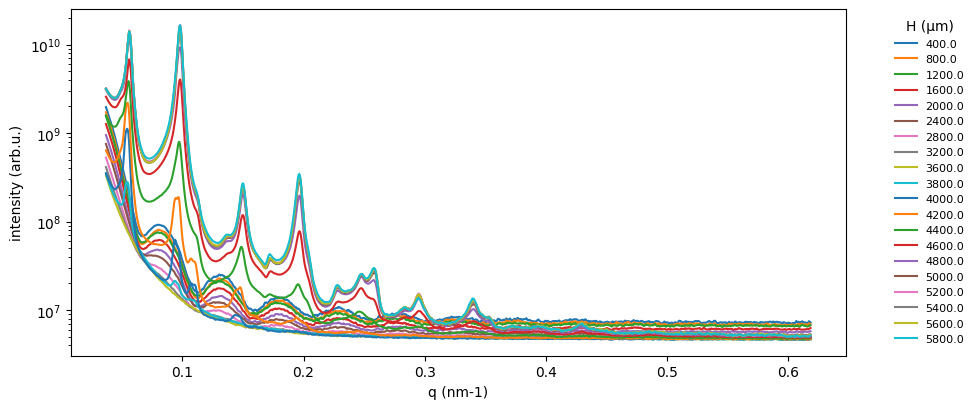

In [8]:
# Plotting of the SAXS traces and saving the figure.
fig, ax, colors = plot_saxs_traces(x_data, y_data, z_label_traces, x_label, y_label, z_label_legend, savepath="figure_B_SAXS_1D.png")

Sanity check: when using the function, we should of course see the same plot again.

# Exercises

<div class="alert alert-block alert-info">
Let's get to work with some hands-on learning!
</div>

> In a first set of exercises (1.1-1.3), we will keep the current plot type (the above displayed collection of line traces), but try to improve it by
>- verifying the potential loss of trace distinguishability upon gray-scale printing
>- making it more appealing and inclusive - thinking of a colorblind audience and potential black-and-white printing
>- highlight the interesting part of the data

> In a second set of exercises (2.1-2.3), we explore pro's and con's of other plot types for our aim to transmit the message, including
>- 2D plots (aka "heatmaps")
>- other 1D plots
>- animated 1D plots

<div class="alert alert-block alert-info">
<b>Tip:</b> You can find some possible solutions in the `/solutions` directory.
</div>

## Exercise 1.1

Test how your color scheme employed for the traces above turns out after printing in grey scale.

_Hint: in case of limited time, simply skip this exercise and move to the next one (1.2)._


In [9]:
# Add your solution here ...

In [10]:
# Let's first define some function which convert from hex codes to RGB tuples and from hex colors to greyscale colors.

# Function to convert hex codes to RGB tuples
def hex_to_rgb(hex_color):
    """Convert a hex color code to an RGB tuple."""
    hex_color = hex_color.lstrip('#')  # Remove the '#' if present
    return tuple(int(hex_color[i:i + 2], 16) / 255.0 for i in (0, 2, 4))  # Convert to RGB and normalize to [0, 1] range

# Function to convert hex colors to greyscale colors
def hex_colors_to_greyscale(hex_colors):
    """
    Convert a list of hex color codes to their greyscale equivalents.

    Parameters
    ----------
    hex_colors : list of str. List of color hex codes, e.g. ['#1f77b4', '#ff7f0e']

    Returns
    -------
    greyscale_colors : list of str. List of greyscale hex codes.
    """
    # Convert hex to RGB, then to greyscale, then back to hex
    greyscale_colors = []
    for hex_code in hex_colors:
        rgb = matplotlib.colors.to_rgb(hex_code)
        # Standard luminance formula for greyscale
        grey = 0.299 * rgb[0] + 0.587 * rgb[1] + 0.114 * rgb[2]
        grey_hex = matplotlib.colors.to_hex((grey, grey, grey))
        greyscale_colors.append(grey_hex)
    return greyscale_colors

# convert list of RGB colors to greyscale colors
def rgb_to_greyscale(rgb_colors):
    """
    Convert a list of RGB colors to their greyscale equivalents.

    Parameters
    ----------
    rgb_colors : list. List of RGB colors as tuples or lists.

    Returns
    -------
    greyscale_colors : list. List of greyscale colors.
    """
    rgb_colors = np.array(rgb_colors)  # convert to numpy array for easier manipulation
    if rgb_colors.ndim == 1:  # if a single RGB color is provided
        rgb_colors = rgb_colors[None, :]
    elif rgb_colors.ndim != 2 or rgb_colors.shape[1] != 3:  # check if the input is a valid RGB array
        raise ValueError("Input must be a list of RGB colors as tuples or lists, or a 2D numpy array with shape (n_colors, 3).")
    L = 0.2126 * rgb_colors[:, 0] + 0.7152 * rgb_colors[:, 1] + 0.0722 * rgb_colors[:, 2]  # calculate luminance
    greyscale_colors = [(luminance, luminance, luminance) for luminance in L]       # generate a list of greyscale colors
    return greyscale_colors

# # Example usage of the functions
# hex_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# rgb_colors = [hex_to_rgb(hex_color) for hex_color in hex_colors]  # convert hex colors to RGB tuples
# greyscale_colors = rgb_to_greyscale(rgb_colors)  # convert RGB colors to greyscale colors
# # Convert greyscale colors back to hex codes
# greyscale_hex_colors = [matplotlib.colors.to_hex(color) for color in greyscale_colors]

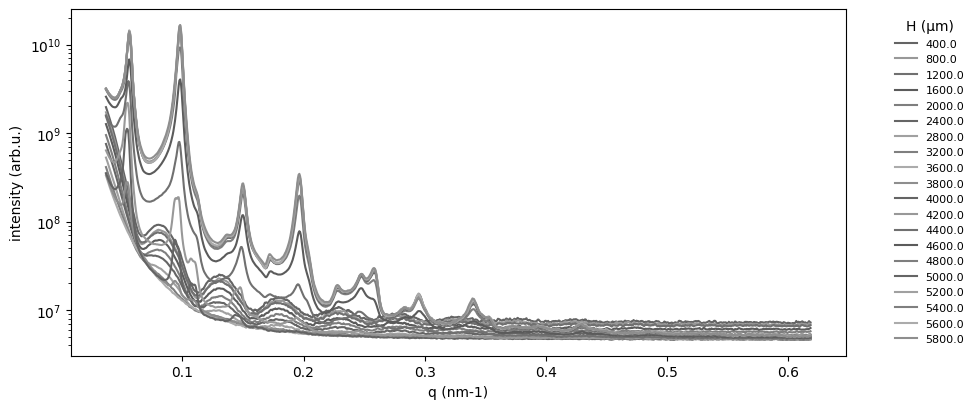

In [11]:
# Convert the hex colors to greyscale hex codes
greyscale_hex_colors = hex_colors_to_greyscale(colors)

# We can now simulate grey-scale printing of our colored traces:
fig, ax, colors = plot_saxs_traces(x_data, y_data, z_label_traces, x_label, y_label, z_label_legend, colors=greyscale_hex_colors, savepath="figure_B_SAXS_1D_grey.png")

Well, this is poorly distinguishable for a grey-scale observer/printer ...

## Exercise 1.2

Increase the readability of your plot for a broader audience, including:
-  a color-blind person
-  someone only having access to a hardcopy printed in grayscale

_Hint: one option would be to make use matplotlib's perceptually uniform sequential colormaps_:
https://matplotlib.org/stable/users/explain/colors/colormaps.html


In [12]:
# Add your solution here ...

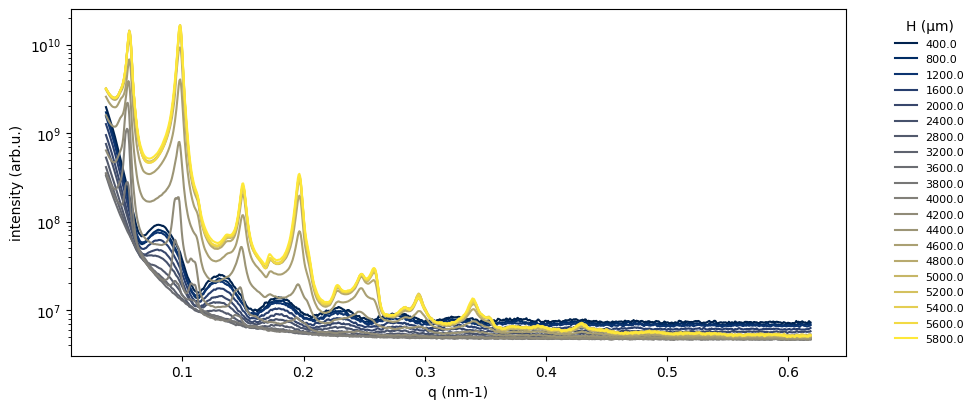

In [13]:
# Plot using trace colors taken from a colormap. Here are some possible choices:
# - for perceptually uniform sequential colormaps:      "viridis", "plasma", "inferno", "magma", "cividis"
# - for diverging colormaps:                            "coolwarm", "bwr", "seismic", "berlin", "managua", "PiYG", "PRGn", "BrBG", "PuOr", and many more
# - for colormaps alluding to the visible spectrum:     "Spectral", "rainbow", "jet", "turbo", and several more
cmap = plt.get_cmap("cividis")                      # choose a colormap. "Cividis" is a good choice for colorblind-friendly plots and also works well in black and white prints.
colors = cmap(np.linspace(0, 1, y_data.shape[1]))   # generate colors for each trace in y_data
# if some of the colors appear unsuitable for a trace color (e.g., too light on a white background), you can manually adjust the color range, e.g.:
# colors = cmap(np.linspace(0, 0.9, y_data.shape[1]))  # this would only use the first 90% of the range of the colormap

# NOTE: Instead of using a suitable matplotlib colormap, an alternative solution would be to adapt the matplotlib plotting style
# matplotlib.style.use("seaborn-v0_8-colorblind")      # you can see the available styles by running `plt.style.available`. Some colorblind-friendly styles are "seaborn-v0_8-colorblind" or "tableau-colorblind10". # matplotlib.style.use("default") would reset it to the default style

# We can now simulate grey-scale printing of our colored traces:
fig, ax, colors = plot_saxs_traces(x_data, y_data, z_label_traces, x_label, y_label, z_label_legend, colors=colors, savepath="figure_B_SAXS_1D_inclusive.png")

Let's check how this new color scheme turns out in case traces are printed our in greyscale

In [14]:
# install colorspacious for color space conversion
!pip install colorspacious
from colorspacious import cspace_converter

# Function to generate from a matplotlib colormap a new colormap based on its lightness values in CAM02-UCS colorspace
def convert_colormap_to_lightness(colormap):
    """
    Generate from a matplotlib colormap a new colormap based on its lightness values in CAM02-UCS colorspace.
    
    Parameters
    ----------
    colormap: matplotlib colormap, e.g., plt.get_cmap("cividis")
        The colormap to convert.    

    Returns
    -------
    L: array of lightness values
    """
    
    # Check if the input is a valid matplotlib colormap.
    if not isinstance(colormap, matplotlib.colors.Colormap):
        raise ValueError("Input must be a valid matplotlib colormap.")

    # Indices to step through colormap.
    x = np.linspace(0.0, 1.0, 100)

    # Get RGB values for colormap.
    rgb = colormap(x)[np.newaxis, :, :3]

    # Convert the colormap in CAM02-UCS colorspace.
    lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
    L = lab[0, :, 0]
    colormap_L = np.float32(np.vstack((L, L, L))).T
    # Generate a matplotlib colormap based on the lightness values.
    colormap_L = matplotlib.colors.ListedColormap(colormap_L / 100, name=colormap.name + "_L")

    return colormap_L

& was unexpected at this time.
The value specified in an AutoRun registry key could not be parsed.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\boehs\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [15]:
# Choose a colormap and convert it to lightness values in CAM02-UCS colorspace.
cmap = plt.get_cmap("cividis")                  # you can change this to any other colormap available in matplotlib
cmap_L = convert_colormap_to_lightness(cmap)    # convert the colormap to a colormap based on its lightness values in CAM02-UCS colorspace

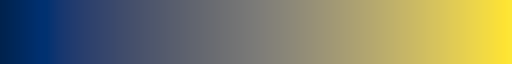

In [16]:
# the original colormap
cmap

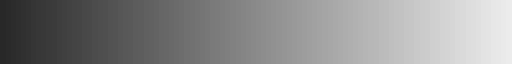

In [17]:
# the colormap based on lightness values in CAM02-UCS colorspace
cmap_L

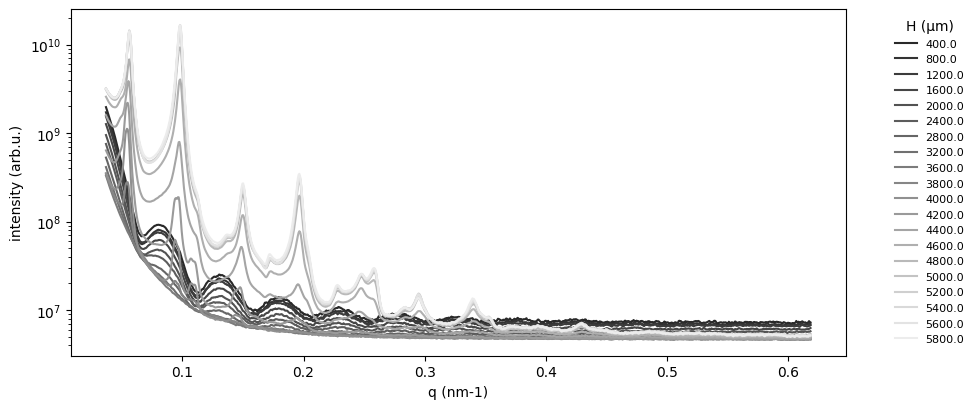

In [18]:
# Plot using trace colors taken from the grey-scale equivalent of the colormap
colors = cmap_L(np.linspace(0, 1, y_data.shape[1]))   # generate colors for each trace in y_data

# We can now simulate grey-scale printing of our colored traces:
fig, ax, colors = plot_saxs_traces(x_data, y_data, z_label_traces, x_label, y_label, z_label_legend, colors=colors, savepath="figure_B_SAXS_1D_inclusive_grey.png")

_NOTE: While we here just simulated full color blindness (of the eye, or the printer) using color conversions to a grey scale,
there are of course many other forms of color blindness around. For further impressions how your image may be seen by a (partially) color-blind person, you may consult online resources such as:_
https://www.color-blindness.com/coblis-color-blindness-simulator/

## Exercise 1.3

Imagine you have identified some interesting features in the spectrum. Now you want to ensure a reader of your publication sees them as well. Adapt the above plot by
-  zooming into a q-range of interest

Likely, to better reveal the feature you want to emphasize, you also may want to further adapt
-  the displayed intensity range
-  the figure size and/or aspect ratio

_Hint: you could potentially look at the q-range from 0.21 to 0.31 $nm^{-1}$, but the choice is entirely up to you. Maybe you find a more interesting region still?_

In [19]:
# Add your solution here ...

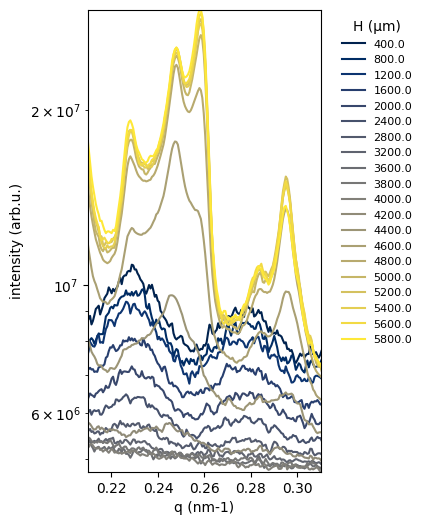

In [20]:
# Create the figure and axis
figsize = (3, 6)     # set the figure size, e.g., (3, 6) for a vertically extended plot or (6, 3) for a horizontally extended plot
fig, ax = plt.subplots(1, 1, figsize=figsize)

# Choose a color scheme for the traces
# Plot using trace colors taken from a colormap.
cmap = plt.get_cmap("cividis")                      # we keep the "cividis" colormap as a perceptually uniform sequential colormaps
colors = cmap(np.linspace(0, 1, y_data.shape[1]))   # generate colors for each trace in y_data

# Plot the data
for i in range(y_data.shape[1]):
    ax.plot(x_data, y_data[:, i], label=z_label_traces[i], color=colors[i])

# Apply some cosmetics
ax.set_yscale("log")  # Set y-axis to logarithmic scale
ax.set_xlabel(x_label)  # Set x-axis label
ax.set_ylabel(y_label)  # Set y-axis label
ax.legend(title=z_label_legend, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)     # Add a legend outside the plot

# Zoom in onto a smaller q-range
xlim = (0.21, 0.31)  # Define the x-limits to zoom in on a specific range
ax.set_xlim(xlim)  # Set x-limits

# Now also adjust the intensity range (y-axis limits) based on the visible data in the new x-range
mask = (x_data >= min(xlim)) & (x_data <= max(xlim))    # Get the mask for x_data within the new x-limits
y_visible = y_data[mask]                # Find the min and max y values in the displayed x-range 
y_visible = y_visible[y_visible > 0]    # exclude zeros or negative values for log scale
if y_visible.size > 0:                  # Set new y-axis limits based on the visible data
    ax.set_ylim(y_visible.min(), y_visible.max())
else:
    raise ValueError("No positive data in the specified q-range. Please check the data and/or adapt the x-limits.")

# Save the figure
fig.savefig("figure_B_SAXS_1D_xzoom.png", dpi=300, bbox_inches="tight")

## Exercise 2.1

The current graph is too busy, with the 20 individual traces often overlapping each other. Let's make each individual trace more appreciable by exploring other 1D data types, such as:<br>
- vertically stacked traces
- perspective view

_Extra task: not all choices are good. Note down some pro's and con's of each plotting type. Think not only of the aesthetics, but also about the information content ..._

In [21]:
# Add your solution here ...

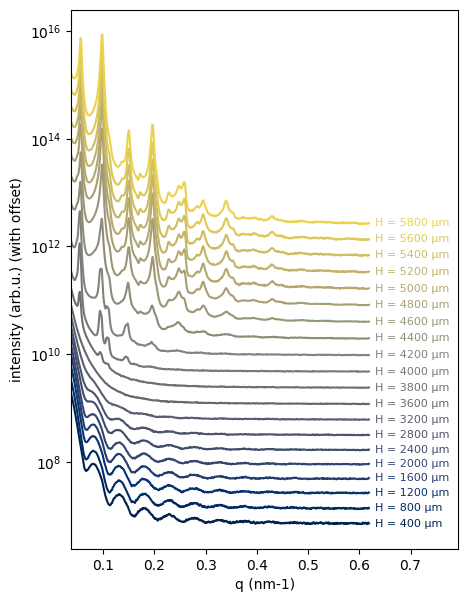

In [22]:
# Vertically offset each trace for better visibility (stacked plot)
figsize = (5, 7)
fig, ax = plt.subplots(1, 1, figsize=figsize)

# Choose a color scheme for the traces
cmap = plt.get_cmap("cividis")
colors = cmap(np.linspace(0, 0.92, y_data.shape[1]))

offset = 2  # multiplicative offset factor between traces
for i in range(y_data.shape[1]):
    y_offset = y_data[:, i] * (offset ** i)
    ax.plot(
        x_data,
        y_offset,
        color=colors[i]
    )
    # Add label as a textbox to the right of each trace
    ax.text(
        x_data[-1] + 0.02 * (x_data[-1] - x_data[0]),  # more space to the right
        y_offset[-1],
        f"H = {z_label_traces[i]:.0f} μm",
        va='center',
        ha='left',
        fontsize=8,
        color=colors[i],
        bbox=dict(facecolor='none', edgecolor='none', alpha=0.7, pad=0.5)
    )

# Apply some more cosmetics
ax.set_yscale("log")
ax.set_xlabel(x_label)
ax.set_ylabel(y_label + " (with offset)")
x_margin = 0.3 * (x_data[-1] - x_data[0])       # account 30% of the plot area for the text boxes
ax.set_xlim(x_data[0], x_data[-1] + x_margin)   # add a margin to the right side

# Save the figure
fig.savefig("figure_B_SAXS_1D_ystacked.png", dpi=300, bbox_inches="tight")


In [23]:
# For 3D plots with a perspective, you can use the following code snippet.
# fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="3d"))

# ...

## Exercise 2.2

Let's make visually a stronger connection of the SAXS data to the sample. <br>
The sample is divided into 2 distinct parts:<br>
- below 3800 $\mu m$: liquid
- above 3800 $\mu m$: solid

Think of graphical means to visualize this in the plotted SAXS data

_Hint: think of grouping the data by the choice of the color, or using a 2D plot type (heatmap) instead ..._

In [24]:
# Add your solution here ...

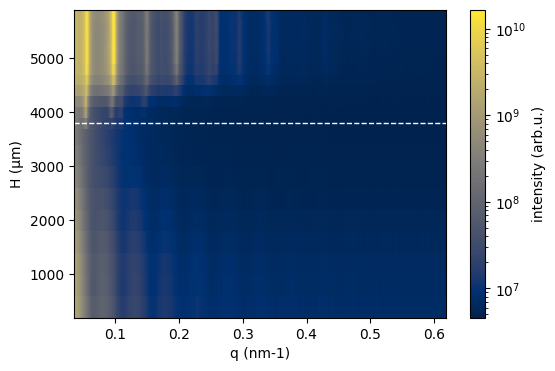

In [25]:
# Plot this data set as a 2D heatmap

# Create a new figure and axis for the heatmap
figsize = (6, 4)     # set the figure size, e.g., (3, 8) for a vertically extended plot or (8, 3) for a horizontally extended plot
fig_heatmap, ax_heatmap = plt.subplots(1, 1, figsize=figsize)                     

# Create a 2D heatmap, using a logarithmic color scale
cax = ax_heatmap.pcolormesh(x_data, z_data, y_data.T, shading='auto', cmap=cmap, norm=matplotlib.colors.LogNorm())  # transpose y_data for correct orientation

# Add a colorbar to the heatmap
cbar = fig_heatmap.colorbar(cax, ax=ax_heatmap)
cbar.set_label(y_label)  # Set the colorbar label 

# Add a white horizontal line at H = 3600 mum, to indicate the transition from the liquid to the solid state
h_transition = 3800  # height in mum
ax_heatmap.axhline(h_transition, color='white', linestyle='--', linewidth=1, label=r'transition at H = {} $\mu m$'.format(h_transition))  # add a horizontal line

# Set the axis labels
ax_heatmap.set_xlabel(x_label)  # Set x-axis label
ax_heatmap.set_ylabel(z_label_legend)  # Set y-axis label

# # Zoom in on the q-range between 0.08 and 0.13
# ax_heatmap.set_xlim(0.08, 0.13)  # Set x-axis limits
# # update the y-axis limits to match the displayed z_data range in this zoomed-in view

# Save the heatmap figure
fig_heatmap.savefig("figure_B_SAXS_2D_heatmap.png", dpi=300, bbox_inches="tight")  # save the heatmap figure

## Exercise 2.3

Let's assume it would make sense to create an animated version of this height-dependent SAXS data set (e.g., for use in a presentation).<br>

Your task: create a GIF file which cycles through the 20 SAXS spectra. Each frame in the GIF should display:<br>
- the current SAXS spectrum
- the associated height in $\mu m$ as a title above the plot

_Hint: one out of several options would be to utilize matplotlib's animation library. You could further try out animation options via plotly or bokeh._

In [26]:
# Add your solution here ...

In [27]:
# One option is to create an animation using matplotlib's FuncAnimation.
from matplotlib import animation

# Create a figure and axis for the animation with higher resolution
fig_anim, ax_anim = plt.subplots(figsize=(8, 4))  # larger figure size

(line,) = ax_anim.plot([], [], lw=2)
title = ax_anim.text(0.5, 1.05, '', transform=ax_anim.transAxes, ha='center', fontsize=12)

ax_anim.set_xlabel(x_label)
ax_anim.set_ylabel(y_label)
ax_anim.set_yscale('log')
ax_anim.set_xlim(x_data.min(), x_data.max())
ax_anim.set_ylim(y_data[y_data > 0].min(), y_data.max())

def init():
    line.set_data([], [])
    title.set_text('')
    return line, title

def animate(idx):
    y = y_data[:, idx]
    line.set_data(x_data, y)
    line.set_color(colors[idx])
    title.set_text(f'H = {z_label_traces[idx]:.0f} μm')
    title.set_color(colors[idx])  # set the title color to match the trace color
    return line, title

ani = animation.FuncAnimation(
    fig_anim, animate, init_func=init, frames=y_data.shape[1], interval=500, blit=True      # interval in milliseconds, bli
)

# Save as GIF
ani.save('figure_B_SAXS_1D_animated.gif', writer='pillow', fps=2, dpi=300)      # fps = frames per second, dpi = dots per inch (resolution)
plt.close(fig_anim) 

# NOTE: If you want to display the animation also in a Jupyter Notebook, comment out the last two lines of code here
from IPython.display import HTML
HTML(ani.to_jshtml())  # This will display the animation directly in the notebook
    

The End.